In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line

import warnings
warnings.filterwarnings("ignore")

In [90]:
df= pd.read_csv(r'C:\Users\SGujjula\OneDrive - Ashley Furniture Industries, Inc\Work\Personal Work\Pros & Cons of Undersamping & Oversampling\Data\employee_data.csv')
print(df.shape)
df.sample(10)

(14249, 10)


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
2817,155,sales,NaN,0.434123,2,NaN,low,0.439222,Left,3.0
11468,123,sales,NaN,0.347341,3,NaN,medium,0.439556,Employed,2.0
9109,143,sales,NaN,0.735270,3,NaN,medium,0.511181,Employed,4.0
7899,259,engineering,NaN,0.505883,5,NaN,low,0.631046,Employed,4.0
8806,168,engineering,NaN,0.646604,4,NaN,low,0.750448,Employed,3.0
12313,179,management,NaN,0.778958,4,NaN,high,0.830825,Employed,3.0
8901,219,sales,NaN,0.828665,2,NaN,low,1.000000,Employed,4.0
6614,173,support,NaN,0.909850,4,NaN,low,0.713828,Employed,4.0
10339,160,sales,NaN,0.996709,4,NaN,low,0.587482,Employed,3.0
8071,159,engineering,NaN,0.599927,2,NaN,high,0.437425,Left,3.0


#### ----Missing values----

In [91]:
print("Shape of df before handling missing values:", df.shape)
print(df.isna().sum(), "\n")

#remove columns 'filed_complaint' & 'recently_promoted' because the columns majority is null values. 
df.drop(['filed_complaint','recently_promoted'], axis=1, inplace=True)
#remove nulls from remaining columns
df.dropna(axis=0, inplace=True)
df= df.reset_index(drop=True)

print("Shape of df after handling missing values:", df.shape)
print(df.isna().sum())


Shape of df before handling missing values: (14249, 10)
avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64 

Shape of df after handling missing values: (12075, 8)
avg_monthly_hrs    0
department         0
last_evaluation    0
n_projects         0
salary             0
satisfaction       0
status             0
tenure             0
dtype: int64


#### -----Data transformations-----

In [92]:
#--------Label Encoding for 'salary'
#Since the categorical feature- salary is ordinal, we could use Label Encoding instead of One-Hot Encoding
print('Salary before Label Encoding')
print(df.salary.value_counts())

salary_dict={'low':0, 'medium':1, 'high':2}
df.salary=df.salary.map(salary_dict)

print('\n')
print('Salary after Label Encoding')
print(df.salary.value_counts())


Salary before Label Encoding
low       5880
medium    5225
high       970
Name: salary, dtype: int64


Salary after Label Encoding
0    5880
1    5225
2     970
Name: salary, dtype: int64


In [93]:
#---------One-Hot Encoding for 'department'-------- 
df= pd.concat([df.drop('department', axis=1),pd.get_dummies(df.department)], axis=1)

df.sample(5)

,avg_monthly_hrs,last_evaluation,n_projects,salary,satisfaction,status,tenure,IT,admin,engineering,finance,information_technology,management,marketing,procurement,product,sales,support
1421,219,0.635866,3,0,0.683058,Employed,2.0,0,0,0,1,0,0,0,0,0,0,0
2363,275,0.900012,4,1,0.829037,Left,5.0,0,0,0,0,0,0,0,0,0,1,0
7839,161,0.504843,5,1,0.659063,Employed,2.0,0,0,0,0,0,0,0,0,0,1,0
5451,259,0.802212,6,0,0.166055,Employed,3.0,0,0,0,0,0,0,0,0,0,0,1
8631,224,0.726686,4,1,0.847842,Employed,3.0,0,0,0,0,0,0,0,0,0,1,0


In [94]:
#------Binary Label Encoding for 'status'-------
#df_train['status_new']= LabelEncoder().fit_transform(df_train.status)


print('Status before Binary Encoding')
print(df.status.value_counts())

status_dict= {'Left':1, "Employed":0}
df['status_binary']=df.status.map(status_dict)

print('\n')
print('Status after Binary Encoding')
print(df.status_binary.value_counts())

Status before Binary Encoding
Employed    9125
Left        2950
Name: status, dtype: int64


Status after Binary Encoding
0    9125
1    2950
Name: status_binary, dtype: int64


#### -----Data Exploring-----

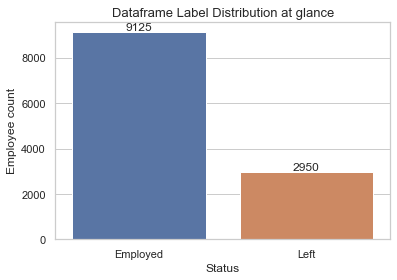

In [95]:
temp= pd.DataFrame(df.status.value_counts().reset_index()
                   .rename({'index': 'Status', 'status': 'Employee count'}, axis=1))


sns.set_style("whitegrid")
ax=sns.barplot(x = 'Status', y = 'Employee count',data = temp)
ax.bar_label(ax.containers[0])
ax.set_title('Dataframe Label Distribution at glance', fontsize=13)
plt.show()

## UnderSampling

###### Defining some iterative functions 

In [150]:
#Undersampling by removing majority samples
def Undersampling(dataframe):

    employed, left = dataframe.status_binary.value_counts()

    temp1=dataframe[dataframe['status_binary']==0].sample(left)
    temp2=dataframe[dataframe['status_binary']==1]

    df_under= pd.concat([temp1, temp2], axis=0)
    print("Shape of the Undersampled dataframe: ",df_under.shape)
    print("Prediction Label counts")
    print(df_under.status_binary.value_counts())
    
    return df_under


#Oversampling by removing majority samples
def Oversampling(dataframe):

    employed, left = dataframe.status_binary.value_counts()

    temp1=dataframe[dataframe['status_binary']==0]
    temp2=dataframe[dataframe['status_binary']==1].sample(employed, replace=True)

    df_over= pd.concat([temp1, temp2], axis=0)
    print("Shape of the Oversampled dataframe: ",df_over.shape)
    print("Prediction Label counts")
    print(df_over.status_binary.value_counts())
    
    return df_over


#Train Test Split
def Train_Test_Split(dataframe):
    
    X,y = dataframe.drop(['status_binary','status'], axis=1), dataframe['status_binary']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify= y)
    
    #print("Train data shape:", X_train.shape, y_train.shape)
    #print('Train data labels shape:\n', y_train.value_counts())
    #print("\n")
    #print("Test data shape:", X_test.shape, y_test.shape)
    #print('Test data labels shape:\n', y_test.value_counts())    
    
    return X_train, X_test, y_train, y_test

#Plot Label count for Train & Test data
def plot_labelcount(X_train,X_test,y_train, y_test):
    
    temp_train= pd.concat([X_train, y_train], axis=1)
    temp_train=pd.DataFrame(temp_train.status_binary.value_counts().reset_index()
                       .rename({'index': 'Status', 'status_binary': 'Employee count'}, axis=1))
    temp_train['Status']=temp_train['Status'].map({0:'Employed', 1:'Left'})
    temp_train['Split']='Train'
    
    temp_test= pd.concat([X_test, y_test], axis=1)
    temp_test=pd.DataFrame(temp_test.status_binary.value_counts().reset_index()
                       .rename({'index': 'Status', 'status_binary': 'Employee count'}, axis=1))
    temp_test['Status']=temp_test['Status'].map({0:'Employed', 1:'Left'})
    temp_test['Split']='Test'
    
    #Union Train & Test Label Counts into a single dataframe
    temp= pd.concat([temp_train, temp_test], axis=0)    
    
    sns.set_style("whitegrid") 
    ax=sns.barplot(x="Split", y="Employee count", hue="Status", data=temp)      
    for container in ax.containers:
        ax.bar_label(container)


#Model and Classification Report
def Model(X_train, X_test, y_train,y_test):
    
    #Model Build
    lr= LogisticRegression(max_iter= 90)
    lr.fit(X_train, y_train)
    y_pred=lr.predict(X_test)

    #Classification Report
    print("Classification Report:\n",classification_report(y_test, y_pred))
    
    return y_pred
    

#### Case 1: Undersample the majority class after performing Train/Test split for the model

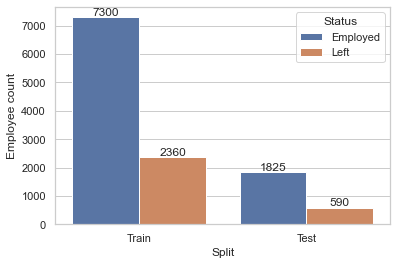

In [118]:
#Train-Test Split before undersampling
X_train2, X_test2, y_train2, y_test2= Train_Test_Split(df)

#plot Train-Test Label distributions  
plot_labelcount(X_train2, X_test2, y_train2, y_test2)

Shape of the Undersampled dataframe:  (4720, 18)
Prediction Label counts
0    2360
1    2360
Name: status_binary, dtype: int64


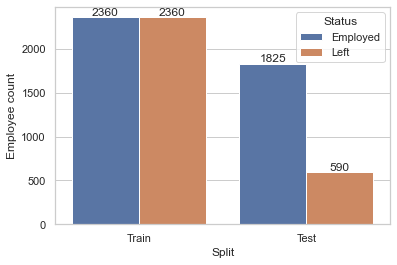

In [120]:
#Train data- Combine X_train_under2 and y_train_under2 into train dataframe
df_train2= pd.concat([X_train2, y_train2], axis=1)

#Undersampling majority class only on  Train data
df_train_under2= Undersampling(df_train2)

#Split df_train_under2 into X_train_under2, y_train_under2
X_train_under2, y_train_under2= df_train_under2.drop(['status_binary'], axis=1),  df_train_under2['status_binary']

#plot Train-Test Label distributions  
plot_labelcount(X_train_under2, X_test2, y_train_under2, y_test2)

In [104]:
#Model & Classification Report

Model(X_train_under2, X_test2, y_train_under2, y_test2)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80      1825
           1       0.46      0.71      0.56       590

   micro avg       0.73      0.73      0.73      2415
   macro avg       0.67      0.72      0.68      2415
weighted avg       0.78      0.73      0.74      2415



array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

#### Case 2: Undersample the majority class before performing Train/Test split for the model

In [121]:
#Undersampled dataframe
df_under1= Undersampling(df)
df_under1.head()

Shape of the Undersampled dataframe:  (5900, 19)
Prediction Label counts
0    2950
1    2950
Name: status_binary, dtype: int64


,avg_monthly_hrs,last_evaluation,n_projects,salary,satisfaction,status,tenure,IT,admin,engineering,finance,information_technology,management,marketing,procurement,product,sales,support,status_binary
10906,230,0.752341,3,0,0.786881,Employed,2.0,0,0,0,0,0,0,0,0,0,1,0,0
92,211,0.947729,4,2,0.355980,Employed,7.0,0,0,0,0,0,0,0,0,0,1,0,0
4254,229,0.773862,3,2,0.812341,Employed,7.0,0,0,0,0,0,1,0,0,0,0,0,0
4747,223,0.624450,4,0,0.963443,Employed,10.0,1,0,0,0,0,0,0,0,0,0,0,0
3745,155,0.987076,6,1,0.885828,Employed,5.0,0,0,0,0,0,0,0,0,1,0,0,0


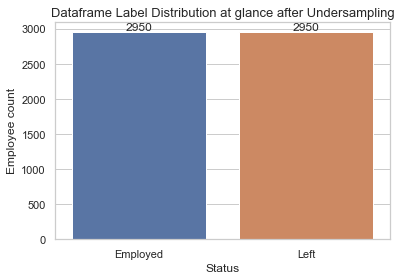

In [153]:
temp= pd.DataFrame(df_under1.status_binary.value_counts().reset_index()
                   .rename({'index': 'Status', 'status_binary': 'Employee count'}, axis=1))

temp['Status']=temp['Status'].map({0:'Employed', 1:'Left'})
sns.set_style("whitegrid")
ax=sns.barplot(x = 'Status', y = 'Employee count',data = temp)
ax.bar_label(ax.containers[0])
ax.set_title('Dataframe Label Distribution at glance after Undersampling', fontsize=13)
plt.show()

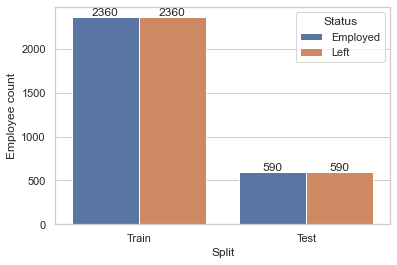

In [122]:
#Split the Undersampled dataset into Train & Test
X_train_under1, X_test_under1, y_train_under1, y_test_under1= Train_Test_Split(df_under1)

#plot Train-Test Label distributions  
plot_labelcount(X_train_under1, X_test_under1, y_train_under1, y_test_under1)

In [123]:
#Model & Classification Report
Model(X_train_under1, X_test_under1, y_train_under1, y_test_under1)

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       590
           1       0.72      0.72      0.72       590

   micro avg       0.72      0.72      0.72      1180
   macro avg       0.72      0.72      0.72      1180
weighted avg       0.72      0.72      0.72      1180



array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

#### Analysis for Undersampling:
It looks like the f1-score has increased for **Case2 model-(Undersampling entire data before Train-Test split)** as compared to **Case1 model-(Undersampling only Train data after Train-Test split)**

But if we take a close look, f1-score, recall, precision are all calculated based on the number of underlying class samples distribution.

The main reason we see the **increase in f1-score in Case-2** is because the mathematical formula calculating precision & recall values takes into consideration the ***fewer class'0' samples from Case-2 as opposed to larger class'0' samples from Case-1***. Hence inflating the numbers and the appearance of better model with the increased f1-score.

Since the **real-world scenario will be closer to Case-1 than Case-2** where we most likely do not expect to predict a balanced class for Employee Churn Prediction, **it is best to proceed with Case-1 model and to always perform Undersampling only on Train data** after the Train-Test split.

## OverSampling

#### Case 3: Oversample the minority class after performing Train/Test split for the model

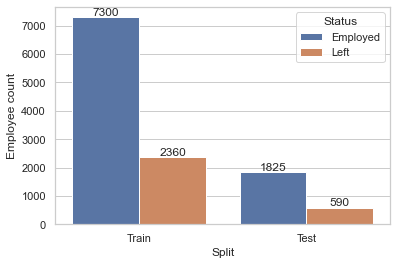

In [141]:
#Train-Test Split before Oversampling

X_train2, X_test2, y_train2, y_test2= Train_Test_Split(df)
plot_labelcount(X_train2, X_test2, y_train2, y_test2)

In [142]:
#Train data- Combine X_train_under2 and y_train_under2 into train dataframe
df_train2= pd.concat([X_train2, y_train2], axis=1)

#Undersampling majority class only on  Train data

df_train_over2= Oversampling(df_train2)
df_train_over2.head()

#Split df_train_under2 into X_train_under2, y_train_under2

X_train_over2, y_train_over2= df_train_over2.drop(['status_binary'], axis=1),  df_train_over2['status_binary']

Shape of the Undersampled dataframe:  (14600, 18)
Prediction Label counts
0    7300
1    7300
Name: status_binary, dtype: int64


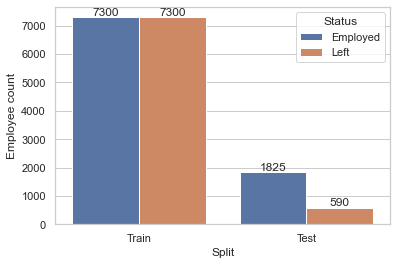

In [143]:
#plot Train-Test Label distributions after Oversampling
plot_labelcount(X_train_over2, X_test2, y_train_over2, y_test2)

In [115]:
#Model & Classification Report

Model(X_train_over2, X_test2, y_train_over2, y_test2)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.73      0.80      1825
           1       0.46      0.69      0.55       590

   micro avg       0.72      0.72      0.72      2415
   macro avg       0.67      0.71      0.67      2415
weighted avg       0.78      0.72      0.74      2415



array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

#### Case 4: Oversample the minority class before performing Train/Test split for the model

In [105]:
#Oversample minorty class
df_over1=Oversampling(df)
df_over1.head()

Shape of the Undersampled dataframe:  (18250, 19)
Prediction Label counts
0    9125
1    9125
Name: status_binary, dtype: int64


,avg_monthly_hrs,last_evaluation,n_projects,salary,satisfaction,status,tenure,IT,admin,engineering,finance,information_technology,management,marketing,procurement,product,sales,support,status_binary
1,184,0.788830,3,1,0.834988,Employed,3.0,0,0,0,0,0,0,0,0,0,1,0,0
2,206,0.575688,4,0,0.424764,Employed,2.0,0,0,0,0,0,0,0,0,0,1,0,0
3,249,0.845217,3,0,0.779043,Employed,3.0,0,0,0,0,0,0,0,0,0,1,0,0
4,140,0.589097,4,1,0.660020,Employed,4.0,0,0,0,0,0,0,0,0,0,1,0,0
5,121,0.625399,3,0,0.835571,Employed,3.0,0,0,0,0,0,0,0,0,0,1,0,0


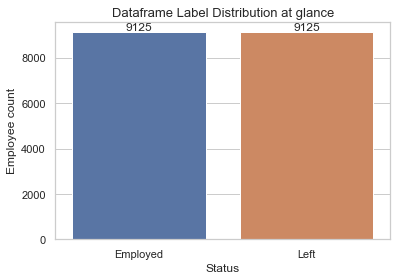

In [152]:
temp= pd.DataFrame(df_over1.status_binary.value_counts().reset_index()
                   .rename({'index': 'Status', 'status_binary': 'Employee count'}, axis=1))

temp['Status']=temp['Status'].map({0:'Employed', 1:'Left'})
sns.set_style("whitegrid")
ax=sns.barplot(x = 'Status', y = 'Employee count',data = temp)
ax.bar_label(ax.containers[0])
ax.set_title('Dataframe Label Distribution at glance after Oversampling', fontsize=13)
plt.show()

Train data shape: (14600, 17) (14600,)
Test data shape: (3650, 17) (3650,)


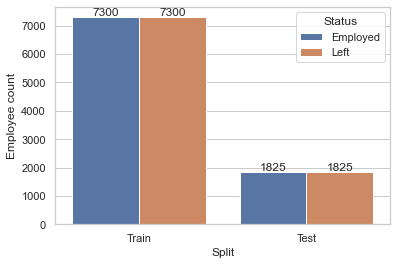

In [106]:
#Split the Oversampled dataset into Train & Test 
X_train_over1, X_test_over1, y_train_over1, y_test_over1= Train_Test_Split(df_over1)

#Plot Train-Test Label distributions  
plot_labelcount(X_train_over1, X_test_over1, y_train_over1, y_test_over1)

In [107]:
#Model & Classification Report
Model(X_train_over1, X_test_over1, y_train_over1, y_test_over1)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73      1825
           1       0.73      0.73      0.73      1825

   micro avg       0.73      0.73      0.73      3650
   macro avg       0.73      0.73      0.73      3650
weighted avg       0.73      0.73      0.73      3650



array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

#### Analysis for Oversampling:
It looks like the f1-score has increased for **Case4 model-(Oversampling entire data before Train-Test split)** as compared to **Case3 model-(Oversampling only Train data after Train-Test split)**

But, if we take a closer look, the main reason we see the **increase in f1-score in Case-4 model** is because of the ***data leakage of duplicated samples into training the model and testing on the same duplicated samples, thereby overfitting the model as opposed to no duplicate data leakage in Case-3 model***.

Hence, **it is best to proceed with Case-3 model and to always apply Undersampling only to Train data** after the Train-Test split.
